#EE769 Assignment 2(Part1)

##Vyomkesh Chaudhary
##203070028

# In Part1 colab file i have done (1) and (2)
# In Part2 Colab file i have done (3) and (4)
# IN Part3 Colab file i have done (5),(6) and (7)

In [ ]:
import numpy as np                                      ##importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##Reading Datasets

In [ ]:
from google.colab import files

data_upload = files.upload()

for file_name in data_upload.keys():
  print(f"{file_name} has been uploaded, with length {len(data_upload[file_name])}")

Saving test.csv to test.csv
Saving Train.csv to Train.csv
test.csv has been uploaded, with length 5095968
Train.csv has been uploaded, with length 15641512


KeyboardInterrupt: ignored

In [ ]:
df_train = pd.read_csv('Train.csv')                       ## Reading csv files into data frames
df_test = pd.read_csv('test.csv')

##Part 1:Data exploration and visualization

In [ ]:
df_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,7411,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,18014,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2,26103,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional
3,31140,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
4,12286,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,43878,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
44546,50718,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional
44547,67177,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
44548,2744,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


#Observations:

1.There are 41 columns which includes 40 features and 1 output.

2.There are 44550 train samples and 14850 test samples. 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44550 entries, 0 to 44549
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     44550 non-null  int64  
 1   amount_tsh             44550 non-null  float64
 2   date_recorded          44550 non-null  object 
 3   funder                 41757 non-null  object 
 4   gps_height             44550 non-null  int64  
 5   installer              41743 non-null  object 
 6   longitude              44550 non-null  float64
 7   latitude               44550 non-null  float64
 8   wpt_name               44550 non-null  object 
 9   num_private            44550 non-null  int64  
 10  basin                  44550 non-null  object 
 11  subvillage             44263 non-null  object 
 12  region                 44550 non-null  object 
 13  region_code            44550 non-null  int64  
 14  district_code          44550 non-null  int64  
 15  lg

#Observations:



1.   40 Columns are features
2.   10 of which are numerical and rest are categorical.
3.   'status_group' column shows the target for each pump
      and labels are 'functional' , 'non functional' , 'functional     needs repair'
4.    Several Null values

In [ ]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,44550.000000,44550.000000,44550.000000,44550.000000,4.455000e+04,44550.000000,44550.000000,44550.000000,44550.000000,44550.000000
mean,37192.623681,307.623224,665.490774,34.084084,-5.721980e+00,0.521549,15.338563,5.678967,179.112750,1295.782155
std,21399.827198,2402.742799,693.653179,6.555924,2.948828e+00,13.835868,17.672144,9.724205,478.995645,953.183961
min,1.000000,0.000000,-90.000000,0.000000,-1.164838e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18723.250000,0.000000,0.000000,33.105585,-8.574241e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37183.500000,0.000000,363.000000,34.905600,-5.045611e+00,0.000000,12.000000,3.000000,25.000000,1985.000000
75%,55647.500000,20.000000,1318.000000,37.176859,-3.327795e+00,0.000000,17.000000,5.000000,210.000000,2004.000000
max,74247.000000,170000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


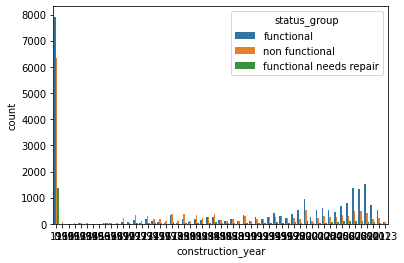

In [ ]:
sns.countplot(x=df_train["construction_year"],hue=df_train["status_group"])     ##plotting contruction_year vs count plot

#Observation:

construction_year can be very useful feature in prediction model.

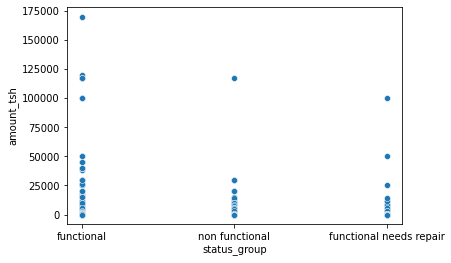

In [ ]:
sns.scatterplot(y=df_train["amount_tsh"],x=df_train["status_group"])    ##plotting amount_tsh vs status_group

#Observation:

approx amount_tsh >200000 then most likely the pump is functional

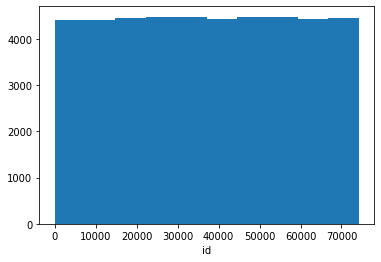

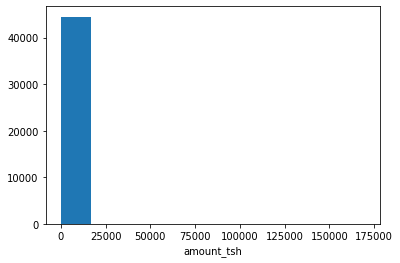

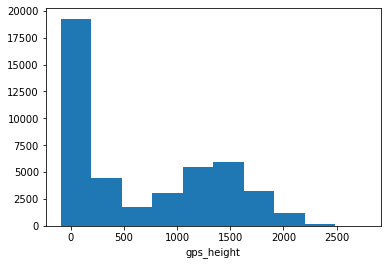

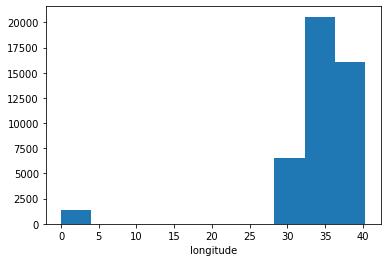

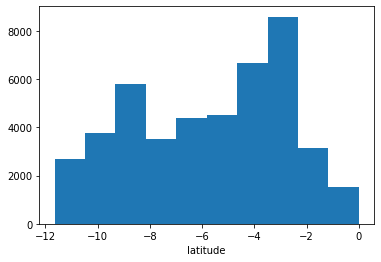

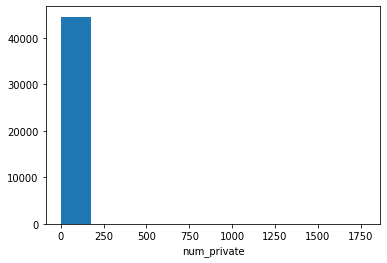

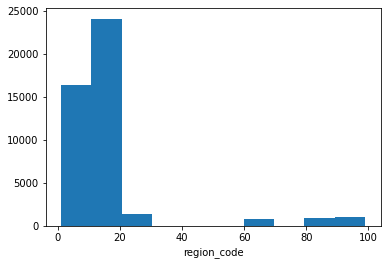

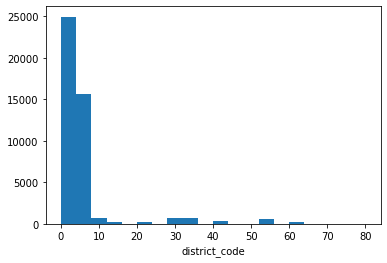

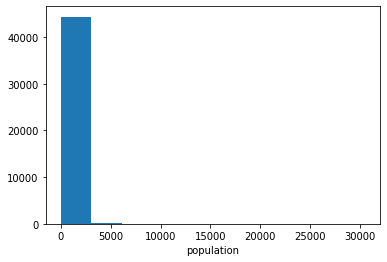

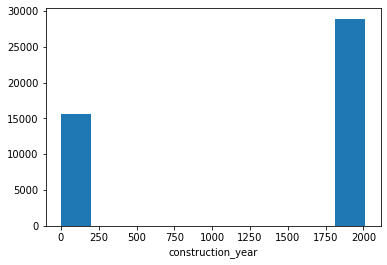

In [ ]:
for col in df_train.columns.values: #for all columns
  #if the values are integer or discrete
  if(df_train[col].dtypes == 'int64') | (df_train[col].dtypes == 'float64'):
    plt.hist(df_train[col],10 if len(pd.unique(df_train[col]))>20 else len(pd.unique(df_train[col])))
    plt.xlabel(col)
    plt.show()

#Observation:

1. data of features like construction_year , population , amount_tsh ,num_private looks like categorical.
2. all variable except id spread well.Drop id.

In [ ]:
df_train=df_train.drop(['id'],axis=1)
df_test=df_test.drop(['id'],axis=1)
df_test=df_test.drop(df_test.columns[0],axis=1)

In [ ]:
numerical_vars = [col for col in df_train.columns if                      ##Columns with int and  float value
                df_train[col].dtype in ['int64', 'float64']]

In [ ]:
for col in numerical_vars: # for each column
  unique_entries = pd.unique(df_train[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df_train[col].isnull().sum()} NaN values")

The column 'amount_tsh'  has 85 unique entries, and 0 NaN values
The column 'gps_height'  has 2396 unique entries, and 0 NaN values
The column 'longitude'  has 43155 unique entries, and 0 NaN values
The column 'latitude'  has 43155 unique entries, and 0 NaN values
The column 'num_private'  has 59 unique entries, and 0 NaN values
The column 'region_code'  has 27 unique entries, and 0 NaN values
The column 'district_code'  has 20 unique entries, and 0 NaN values
The column 'population'  has 956 unique entries, and 0 NaN values
The column 'construction_year'  has 55 unique entries, and 0 NaN values


#Observation:

column num_private has less unique value and we dont have information about it and most of information is zero  so dropping it.

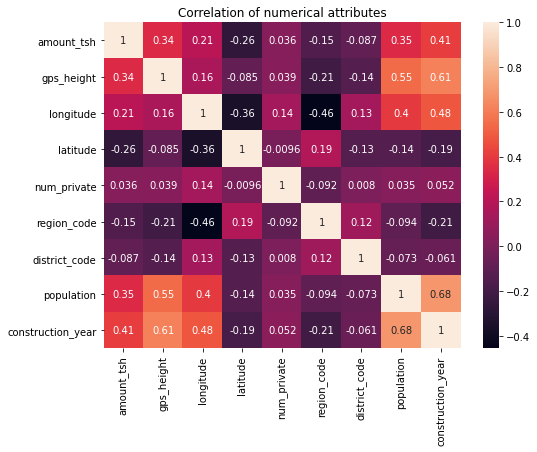

In [ ]:
correlation = df_train.corr(method='spearman')

f, ax = plt.subplots(figsize=(8,6))
plt.title('Correlation of numerical attributes', size=12)
sns.heatmap(correlation,annot=True)

#Observations:
1. correlation between gps_height and construction_year is also high but they dont have any obvious connection.
2. correlation is not too high between columns.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

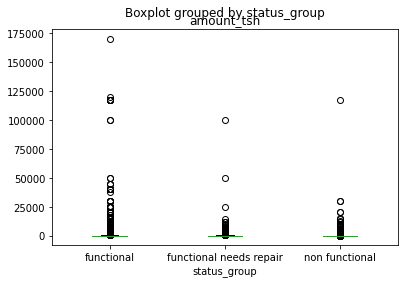

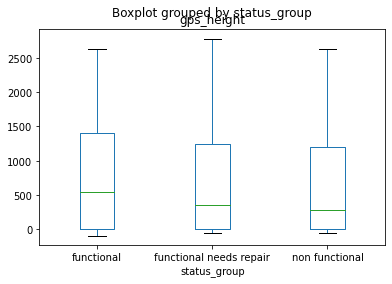

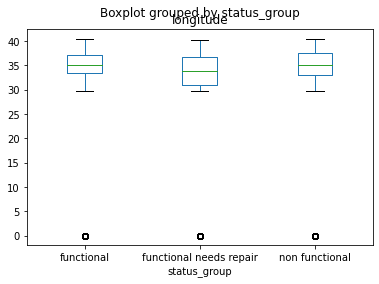

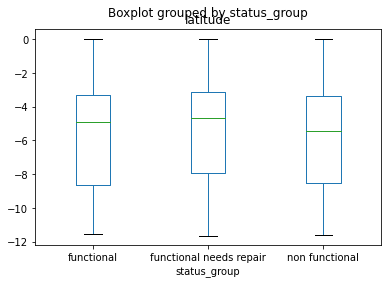

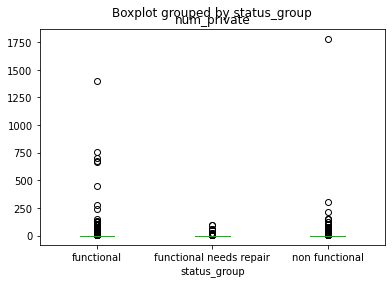

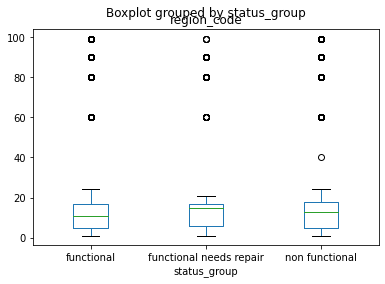

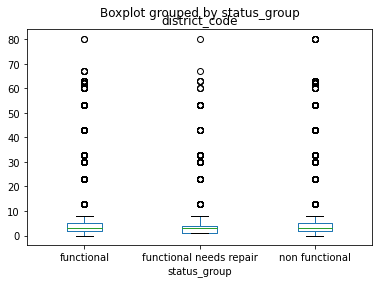

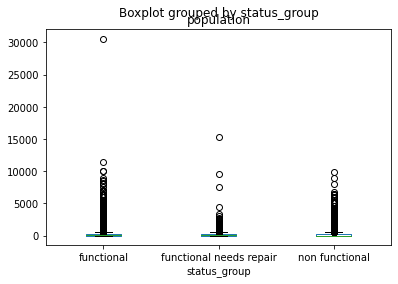

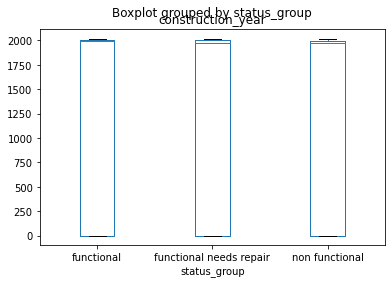

In [ ]:
#Plot side by side boxplot for each variable to find which ones are likely to help predict classes

for col in numerical_vars:
    df_train.boxplot(by='status_group',column=col, grid=False)

#observations:
1. Outliers in Population for
population>13000
2. Outliers in amount_tsh for amount_tsh > 100000

In [ ]:
df_train[numerical_vars].isna().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

#Observation:

None of the numerical columns have missing values.


In [ ]:
len(df_train.population[df_train.population == 0])    ##zero values in population

16150

#Observation:
 16150 entries in population are missing.

In [ ]:
categorical_vars = [col for col in df_train.columns if                      ##Columns with strings
                df_train[col].dtype in ['object']]

print(categorical_vars)

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


In [ ]:
df_train[categorical_vars].isna().sum()          ##nan values in categorical_vars

date_recorded                0
funder                    2793
installer                 2807
wpt_name                     0
basin                        0
subvillage                 287
region                       0
lga                          0
ward                         0
public_meeting            2491
recorded_by                  0
scheme_management         2832
scheme_name              21110
permit                    2336
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
status_group                 0
dtype: int64

#Observations:

featues with nan values: funder , installer , subvillage , public_meeting,scheme_management,scheme_name  ,permit .
           

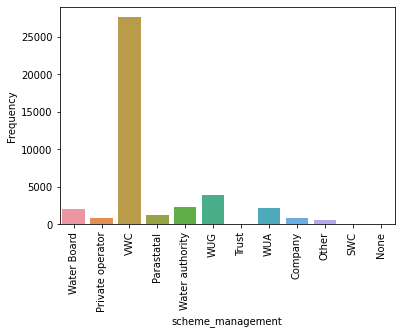

In [ ]:
sns.countplot(x=df_train['scheme_management'])                   ##Visualising scheme_management
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

#Observation:

scheme_management has only 11 categories and null values can be replaced with unknown. 

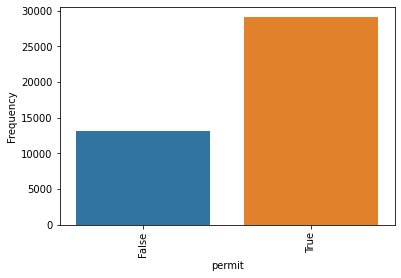

In [ ]:
sns.countplot(x=df_train['permit'])                   ##Visualising permit
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

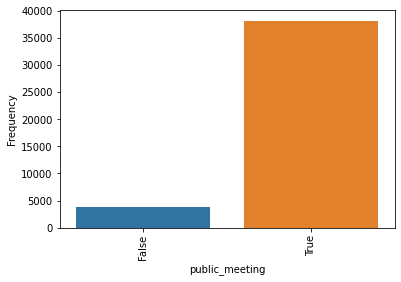

In [ ]:
sns.countplot(x=df_train['public_meeting'])                   ##Visualising public_meeting
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

#Observation:
permit and public_meeting are only true false , nan values can be replaced by unknown .


In [ ]:
for col in categorical_vars: # for each column
  unique_entries = pd.unique(df_train[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries)} unique entries, and {df_train[col].isnull().sum()} NaN values")

The column 'date_recorded'  has 346 unique entries, and 0 NaN values
The column 'funder'  has 1652 unique entries, and 2793 NaN values
The column 'installer'  has 1855 unique entries, and 2807 NaN values
The column 'wpt_name'  has 28991 unique entries, and 0 NaN values
The column 'basin'  has 9 unique entries, and 0 NaN values
The column 'subvillage'  has 16618 unique entries, and 287 NaN values
The column 'region'  has 21 unique entries, and 0 NaN values
The column 'lga'  has 125 unique entries, and 0 NaN values
The column 'ward'  has 2080 unique entries, and 0 NaN values
The column 'public_meeting'  has 3 unique entries, and 2491 NaN values
The column 'recorded_by'  has 1 unique entries, and 0 NaN values
The column 'scheme_management'  has 13 unique entries, and 2832 NaN values
The column 'scheme_name'  has 2507 unique entries, and 21110 NaN values
The column 'permit'  has 3 unique entries, and 2336 NaN values
The column 'extraction_type'  has 18 unique entries, and 0 NaN values
The 

#Observation:

1. subvillage has too many unique entries and nan values is replaced by mode of values of the same region code.
2. public_meeting and permit has TRUE/FALSE values so nan values are replaced by unknown values.


##Part 2:Variable transformation, feature engineering, feature selection or elimination

similar features:

1. waterpoint_type and waterpoint_type_group
2. source and source_type
3. quantity and quantity group
4. water_quality and quality_group
5. payment and payment_type
6. management and management_group
7. extraction_type , extraction_type_group and extraction_type_class
8. scheme_name and scheme_management
9. subvillage, region, region_code, district_code, lga, ward

contains similar information

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


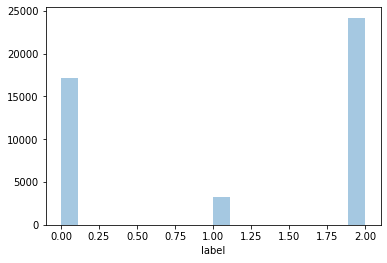

In [ ]:
label_dict = {"functional":2,"functional needs repair":1,"non functional":0}                ##changing the labels as numbers
df_train["label"] = df_train["status_group"].map(label_dict)
sns.distplot(df_train["label"],kde=False)

In [ ]:
df_train

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,label
0,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Kwa Abdalla,0,Pangani,Mafurini,Kilimanjaro,3,5,Hai,Machame Kaskazini,90,True,GeoData Consultants Ltd,Water Board,Machame water supply,True,2008,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
1,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,none,0,Lake Nyasa,Ituni,Iringa,11,5,Ludewa,Luana,70,False,GeoData Consultants Ltd,Private operator,Mgowel,False,1984,gravity,gravity,gravity,private operator,commercial,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
2,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Kwa Loishiye,0,Pangani,Melebuki,Arusha,2,2,Arusha Rural,Kimnyaki,150,True,GeoData Consultants Ltd,VWC,Saitero olosaita pipe line,True,2002,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0
3,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Mwanzechele,0,Rufiji,Darajani,Mbeya,12,2,Mbeya Rural,Inyala,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,wug,user-group,pay annually,annually,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional,2
4,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Kwa Kidaya,0,Pangani,Mwira A,Kilimanjaro,3,2,Mwanga,Shinghatini,34,True,GeoData Consultants Ltd,VWC,Churu water supply,False,2007,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,0.0,2013-01-23,World Vision,0,TAWASA,32.383715,-3.457624,Imalabuluhi,0,Lake Tanganyika,Bukenge,Shinyanga,17,3,Kahama,Segese,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2
44546,0.0,2011-07-25,Ded,0,DED,31.615509,-2.738682,Ilyamchele Center,0,Lake Victoria,Ilyamchele Center,Kagera,18,8,Chato,Katende,0,True,GeoData Consultants Ltd,WUA,NaN,True,0,afridev,afridev,handpump,wua,user-group,pay monthly,monthly,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,non functional,0
44547,0.0,2013-02-23,Government Of Tanzania,969,Government,35.134412,-10.676062,Kwa Mzee Maondo,0,Ruvuma / Southern Coast,Masango,Ruvuma,10,3,Mbinga,Kigonsera,60,NaN,GeoData Consultants Ltd,VWC,Government,NaN,1977,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2
44548,200.0,2013-03-26,Adra,1269,ADRA/Government,37.886287,-4.390882,Miembeni,0,Pangani,Mng'Ende,Kilimanjaro,3,3,Same,Suji,80,True,GeoData Consultants Ltd,Water authority,Kiumba water supply,True,2011,gravity,gravity,gravity,vwc,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2


In [ ]:
df_train = df_train.drop(['status_group'],axis='columns')

In [ ]:
columns_to_drop = ['subvillage','region','lga','ward','scheme_name','extraction_type_group',
                   'extraction_type_class','management_group','payment','water_quality',
                   'quantity','source_type','waterpoint_type_group','recorded_by','num_private','wpt_name']



In [ ]:
df_train = df_train.drop(columns_to_drop,axis='columns')         ##dropping columns from train dataset
df_test = df_test.drop(columns_to_drop,axis='columns')           ## dropping columns from test dataset

In [ ]:
df_train["scheme_management"].fillna("unknown", inplace = True)                          ## replacing nan values with 'unknown' string
df_train["public_meeting"].fillna("unknown", inplace = True)
df_train["permit"].fillna("unknown", inplace = True)
df_train["funder"].fillna("unknown", inplace = True)
df_train["installer"].fillna("unknown", inplace = True)

df_test["scheme_management"].fillna("unknown", inplace = True)
df_test["public_meeting"].fillna("unknown", inplace = True)
df_test["permit"].fillna("unknown", inplace = True)
df_test["funder"].fillna("unknown", inplace = True)
df_test["installer"].fillna("unknown", inplace = True)

In [ ]:
display(df_train.isna().sum())
display(df_test.isna().sum())


amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
source_class         0
waterpoint_type      0
label                0
dtype: int64

amount_tsh           0
date_recorded        0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
basin                0
region_code          0
district_code        0
population           0
public_meeting       0
scheme_management    0
permit               0
construction_year    0
extraction_type      0
management           0
payment_type         0
quality_group        0
quantity_group       0
source               0
source_class         0
waterpoint_type      0
dtype: int64

#Observatioins:

all columns have 0 nan values in test data and train data.

In [ ]:
df_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,basin,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,extraction_type,management,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,label
0,7.0,2013-03-20,Germany Republi,1203,CES,37.228664,-3.256505,Pangani,3,5,90,True,Water Board,True,2008,gravity,water board,per bucket,good,enough,spring,groundwater,communal standpipe,2
1,0.0,2011-02-21,Cdtf,1409,CDTF,34.615481,-9.972601,Lake Nyasa,11,5,70,False,Private operator,False,1984,gravity,private operator,never pay,good,enough,spring,groundwater,communal standpipe,2
2,0.0,2013-01-04,Government Of Tanzania,1572,DWE,36.658778,-3.321529,Pangani,2,2,150,True,VWC,True,2002,gravity,vwc,never pay,good,insufficient,spring,groundwater,communal standpipe,0
3,0.0,2011-04-03,District Council,0,District Council,33.628025,-8.860795,Rufiji,12,2,0,True,VWC,True,0,gravity,wug,annually,good,insufficient,river,surface,communal standpipe,2
4,300.0,2013-03-08,District Council,1283,District Council,37.655509,-3.669777,Pangani,3,2,34,True,VWC,False,2007,gravity,vwc,monthly,good,insufficient,spring,groundwater,communal standpipe,2


In [ ]:
categorical_vars1 = [col for col in df_train.columns if                      ##Columns with strings
                df_train[col].dtype in ['object']]

print(categorical_vars1)

['date_recorded', 'funder', 'installer', 'basin', 'public_meeting', 'scheme_management', 'permit', 'extraction_type', 'management', 'payment_type', 'quality_group', 'quantity_group', 'source', 'source_class', 'waterpoint_type']


In [ ]:
for col in categorical_vars1: # for each column
  unique_entries1 = pd.unique(df_train[col]) # unique elements in a column
  print(f"The column '{col}'  has {len(unique_entries1)} unique entries, and {df_train[col].isnull().sum()} NaN values")

The column 'date_recorded'  has 346 unique entries, and 0 NaN values
The column 'funder'  has 1652 unique entries, and 0 NaN values
The column 'installer'  has 1855 unique entries, and 0 NaN values
The column 'basin'  has 9 unique entries, and 0 NaN values
The column 'public_meeting'  has 3 unique entries, and 0 NaN values
The column 'scheme_management'  has 13 unique entries, and 0 NaN values
The column 'permit'  has 3 unique entries, and 0 NaN values
The column 'extraction_type'  has 18 unique entries, and 0 NaN values
The column 'management'  has 12 unique entries, and 0 NaN values
The column 'payment_type'  has 7 unique entries, and 0 NaN values
The column 'quality_group'  has 6 unique entries, and 0 NaN values
The column 'quantity_group'  has 5 unique entries, and 0 NaN values
The column 'source'  has 10 unique entries, and 0 NaN values
The column 'source_class'  has 3 unique entries, and 0 NaN values
The column 'waterpoint_type'  has 7 unique entries, and 0 NaN values


#Observations:

1. columns with cardanality lower than 10 can be one hot encoded

*   status_group(target)
*   waterpoint_type
*   source_class
*   source
*   quantity_group
*   quality_group
*   payment_type
*   permit
*   public_meeting
*   basin

2. columns with cardanality which can be reduced to 10 to perform one hot encoding



*   management
*   extraction_type
*   scheme_management

3. columns with cardanality too high

*   funder
*   installer
*   date_recorded






















#reducing  cardanality of columns.

##scheme_management

In [ ]:
df_train['scheme_management'].value_counts()        ##counts of unique strings

VWC                 27651
WUG                  3906
unknown              2832
Water authority      2361
WUA                  2166
Water Board          2078
Parastatal           1272
Private operator      792
Company               790
Other                 575
SWC                    69
Trust                  57
None                    1
Name: scheme_management, dtype: int64

In [ ]:
def reducing_cadanality(row):                         ##reducing cardanality by taking Trust,None,unknown as other
    if row['scheme_management']=='VWC':
        return 'vwc'
    elif row['scheme_management']=='WUG':
        return 'wug'
    elif row['scheme_management']=='Water authority':
        return 'wtr_auth'
    elif row['scheme_management']=='WUA':
        return 'wua'
    elif row['scheme_management']=='Water Board':
        return 'wtr_brd'
    elif row['scheme_management']=='Parastatal':
        return 'parastatal'
    elif row['scheme_management']=='Private operator':
        return 'pri_optr'
    elif row['scheme_management']=='SWC':
        return 'swc'
    elif row['scheme_management']=='Company':
        return 'company'
    else:
        return 'other'
df_train['scheme_management'] = df_train.apply(lambda row: reducing_cadanality(row), axis=1)
df_test['scheme_management'] = df_test.apply(lambda row: reducing_cadanality(row), axis=1)

#extraction_type

In [ ]:
df_train.extraction_type.value_counts()          ##counts of unique strings

gravity                      20127
nira/tanira                   6130
other                         4768
submersible                   3560
swn 80                        2771
mono                          2164
india mark ii                 1768
afridev                       1339
ksb                           1043
other - rope pump              335
other - swn 81                 177
windmill                        89
india mark iii                  77
cemo                            70
other - play pump               65
walimi                          39
climax                          26
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

reducing cardanility by taking other - mkulima/shinyanga  ,climax , walimi ,other - play pump ,india mark iii ,cemo ,other - rope pump  ,other - swn 81 as other

In [ ]:
def reducing_cadanality1(row):                                                ##Considering first few variables and merging rest with other
    if row['extraction_type']=='gravity':
        return 'gravity'
    elif row['extraction_type']=='nira/tanira':
        return 'nira/tanira'
    elif row['extraction_type']=='submersible':
        return 'submersible'
    elif row['extraction_type']=='swn 80':
        return 'swn_80'
    elif row['extraction_type']=='mono':
        return 'mono'
    elif row['extraction_type']=='india mark ii':
        return 'india_mark_ii'
    elif row['extraction_type']=='afridev':
        return 'afridev'
    elif row['extraction_type']=='ksb':
        return 'ksb'
    elif row['extraction_type']=='windmill':
        return 'windmill'
    else:
        return 'other'
df_train['extraction_type'] = df_train.apply(lambda row: reducing_cadanality1(row), axis=1)
df_test['extraction_type'] = df_test.apply(lambda row: reducing_cadanality1(row), axis=1)

##management

In [ ]:
df_train.management.value_counts()                   ##counts of unique strings

vwc                 30371
wug                  4874
water board          2221
wua                  1907
private operator     1485
parastatal           1347
water authority       677
other                 622
company               512
unknown               402
other - school         70
trust                  62
Name: management, dtype: int64

In [ ]:
def reducing_cadanality2(row):                                              #Merging low frequency variables with other
    if row['management']=='vwc':
        return 'vwc'
    elif row['management']=='wug':
        return 'wug'
    elif row['management']=='water board':
        return 'water board'
    elif row['management']=='wua':
        return 'wua'
    elif row['management']=='private operator':
        return 'private operator'
    elif row['management']=='parastatal':
        return 'parastatal'
    elif row['management']=='water authority':
        return 'water authority'
    elif row['management']=='company':
        return 'company'
    elif row['management']=='trust':
        return 'trust'
    else:
        return 'other'
df_train['management'] = df_train.apply(lambda row: reducing_cadanality2(row), axis=1)
df_test['management'] = df_test.apply(lambda row: reducing_cadanality2(row), axis=1)

##funder

In [ ]:
df_train.funder.value_counts().head(20) 

Government Of Tanzania    6780
unknown                   2793
Danida                    2362
Hesawa                    1639
Rwssp                     1032
Kkkt                       964
World Bank                 962
World Vision               924
Unicef                     808
Tasaf                      665
District Council           655
Dhv                        617
Dwsp                       616
Private Individual         616
0                          572
Norad                      542
Germany Republi            471
Tcrs                       455
Ministry Of Water          443
Water                      441
Name: funder, dtype: int64

In [ ]:
def reducing_cadanality3(row):  
    '''Keep top 8 values and set the rest to 'other'''

    if row['funder']=='Government Of Tanzania':
        return 'gov'
    elif row['funder']=='Danida':
        return 'danida'
    elif row['funder']=='Hesawa':
        return 'hesawa'
    elif row['funder']=='Rwssp':
        return 'rwssp'
    elif row['funder']=='World Bank':
        return 'world_bank'   
    elif row['funder']=='Kkkt':
        return 'kkkt'   
    elif row['funder']=='World Vision':
        return 'world_vision'  
    elif row['funder']=='Unicef':
        return 'unicef'
    else:
        return 'other'
    
df_train['funder'] = df_train.apply(lambda row: reducing_cadanality3(row), axis=1)
df_test['funder'] = df_test.apply(lambda row: reducing_cadanality3(row), axis=1)

##installer

In [ ]:
df_train.installer.value_counts().head(15) 

DWE                   13005
unknown                2807
Government             1365
RWE                     876
Commu                   806
DANIDA                  788
KKKT                    681
Hesawa                  622
0                       572
TCRS                    537
Central government      504
CES                     471
District Council        425
DANID                   420
Community               411
Name: installer, dtype: int64

In [ ]:
def reducing_cadanality4(row):  
    '''Keep top 8 values and set the rest to 'other'''

    if row['installer']=='DWE':
        return 'dwe'
    elif row['installer']=='Government':
        return 'govt'
    elif row['installer']=='RWE':
        return 'rwe'
    elif row['installer']=='Commu':
        return 'commu'
    elif row['installer']=='DANIDA':
        return 'danida'   
    elif row['installer']=='KKKT':
        return 'kkkt'   
    elif row['installer']=='Hesawa':
        return 'hesawa'  
    elif row['installer']=='TCRS':
        return 'tcrs'
    else:
        return 'other'
    
df_train['installer'] = df_train.apply(lambda row: reducing_cadanality4(row), axis=1)
df_test['installer'] = df_test.apply(lambda row: reducing_cadanality4(row), axis=1)

#Ordinal encoding of categorical data

Several categorical features can be encoded in a specific order that follows from the range of its values.

For example for the quality_group variable, the higher the label, the better the water quality, the more likely a pump is functional.


#quality_group

In [ ]:
df_train.quality_group.value_counts()

good        38093
salty        3932
unknown      1397
milky         606
colored       364
fluoride      158
Name: quality_group, dtype: int64

In [ ]:
order_quality = {"good":3,"salty":2,"milky":2,"colored":2,"fluoride":2,"unknown":1}                             #Giving weights to order quality , high weights to good 
df_train["quality_group_code"] = [order_quality[item] for item in df_train.quality_group]                                                         # small  weights to unknown
del df_train["quality_group"]

df_test["quality_group_code"] = [order_quality[item] for item in df_test.quality_group]
del df_test["quality_group"]

##quantity_group

In [ ]:
df_train.quantity_group.value_counts()

enough          24821
insufficient    11367
dry              4725
seasonal         3049
unknown           588
Name: quantity_group, dtype: int64

In [ ]:
order_quantity = {"enough":3,"insufficient":2,"dry":2,"seasonal":2,"unknown":1}                                         #Assigning weights
df_train["quantity_group_code"] = [order_quantity[item] for item in df_train.quantity_group] 
del df_train["quantity_group"]

df_test["quantity_group_code"] = [order_quantity[item] for item in df_test.quantity_group] 
del df_test["quantity_group"]

##payment_type

In [ ]:
df_train.payment_type.value_counts()

never pay     19002
per bucket     6808
monthly        6182
unknown        6104
on failure     2941
annually       2717
other           796
Name: payment_type, dtype: int64

In [ ]:
order_payment = {"monthly":4,"annually":4,"on failure":3,"per bucket":3,"never pay":2,"unknown":1,"other":1}                #Assigning weights
df_train["payment_code"] = [order_payment[item] for item in df_train.payment_type] 
del df_train["payment_type"]

df_test["payment_code"] = [order_payment[item] for item in df_test.payment_type] 
del df_test["payment_type"]

##public_meeting

In [ ]:
df_train.public_meeting.value_counts()

True       38212
False       3847
unknown     2491
Name: public_meeting, dtype: int64

In [ ]:
order_pub_meet = {True:2,False:1,"unknown":0}
df_train["public_meeting_code"] = [order_pub_meet[item] for item in df_train.public_meeting] 
del df_train["public_meeting"]

df_test["public_meeting_code"] = [order_pub_meet[item] for item in df_test.public_meeting] 
del df_test["public_meeting"]

##permit


In [ ]:
df_train.permit.value_counts()

True       29057
False      13157
unknown     2336
Name: permit, dtype: int64

In [ ]:
order_permit = {True:2,False:1,"unknown":0}
df_train["permit_code"] = [order_permit[item] for item in df_train.permit] 
del df_train["permit"]

df_test["permit_code"] = [order_permit[item] for item in df_test.permit] 
del df_test["permit"]

##Feature Engineering

##amount_tsh

we have defined a threshold to separate functional and non-functional pumps.let's create new binary variable that reflects this information.

In [ ]:
df_train.loc[df_train['amount_tsh'] < 100000, 'amount_tsh'] = 0
df_train.loc[df_train['amount_tsh'] >= 100000, 'amount_tsh'] = 1

df_test.loc[df_test['amount_tsh'] < 100000, 'amount_tsh'] = 0
df_test.loc[df_test['amount_tsh'] >= 100000, 'amount_tsh'] = 1

In [ ]:
df_test.amount_tsh.value_counts()

0.0    14846
1.0        4
Name: amount_tsh, dtype: int64

## Construction_year

we will turn construction_year into a categorical column with bins containing the following values 60s , 70s , 80s,90s,00s ,10s,unknown.



In [ ]:
def construction_short(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
df_train['construction_year'] = df_train.apply(lambda row: construction_short(row), axis=1)
df_test['construction_year'] = df_test.apply(lambda row: construction_short(row), axis=1)



##date_recorded

we will calculate the number of days past since the date_recorded till the most recent date of the dataset. The idea being that more recently recorded pumps might be more likely to be functional than non-functional.

In [ ]:
df_train.date_recorded = pd.to_datetime(df_train.date_recorded)
df_test.date_recorded = pd.to_datetime(df_test.date_recorded)

df_train.date_recorded.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.


count                   44550
unique                    346
top       2011-03-15 00:00:00
freq                      423
first     2002-10-14 00:00:00
last      2013-12-03 00:00:00
Name: date_recorded, dtype: object

In [ ]:
# The most recent data is 2013-12-03. Subtract each date from this point to obtain a 
# 'days_since_recorded' column.

df_train['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(df_train.date_recorded)
df_train['days_since_recorded'] = df_train['days_since_recorded'].astype('timedelta64[D]').astype(int)

df_test['days_since_recorded'] = pd.datetime(2013, 12, 3) - pd.to_datetime(df_test.date_recorded)
df_test['days_since_recorded'] = df_test['days_since_recorded'].astype('timedelta64[D]').astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [ ]:
df_train['days_since_recorded']

0         258
1        1016
2         333
3         975
4         270
         ... 
44545     314
44546     862
44547     283
44548     252
44549     311
Name: days_since_recorded, Length: 44550, dtype: int64

In [ ]:
df_train = df_train.drop("date_recorded",axis=1)
df_test = df_test.drop("date_recorded",axis=1)

##latitude , longitude , gps_height using linear discriminant analysis(LDA)

---



In [ ]:
LDA_cols = ["latitude","longitude","gps_height"]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df_train_sc = sc.fit_transform(df_train[LDA_cols])
df_test_sc = sc.transform(df_test[LDA_cols])



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=None)

df_train_lda = lda.fit_transform(df_train_sc, df_train.label.values.ravel())
df_test_lda = lda.transform(df_test_sc)



In [ ]:
df_train = pd.concat((pd.DataFrame(df_train_lda), df_train), axis=1)
df_test = pd.concat((pd.DataFrame(df_test_lda), df_test), axis=1)

for i in LDA_cols:
    del df_train[i]
    del df_test[i]

In [ ]:
df_train.rename(columns={0: "LDA_0",1:"LDA_1"},inplace=True)
df_test.rename(columns={0: "LDA_0",1:"LDA_1"},inplace=True)

In [ ]:
df_train

,LDA_0,LDA_1,amount_tsh,funder,installer,basin,region_code,district_code,population,scheme_management,construction_year,extraction_type,management,source,source_class,waterpoint_type,label,quality_group_code,quantity_group_code,payment_code,public_meeting_code,permit_code,days_since_recorded
0,0.384948,0.854298,0.0,other,other,Pangani,3,5,90,wtr_brd,00s,gravity,water board,spring,groundwater,communal standpipe,2,3,3,3,2,2,258
1,0.676260,0.647431,0.0,other,other,Lake Nyasa,11,5,70,pri_optr,80s,gravity,private operator,spring,groundwater,communal standpipe,2,3,3,2,1,1,1016
2,0.873908,1.109918,0.0,gov,dwe,Pangani,2,2,150,vwc,00s,gravity,vwc,spring,groundwater,communal standpipe,0,3,2,2,2,2,333
3,-0.835115,-0.672458,0.0,other,other,Rufiji,12,2,0,vwc,unknown,gravity,wug,river,surface,communal standpipe,2,3,2,4,2,2,975
4,0.420906,0.966124,0.0,other,other,Pangani,3,2,34,vwc,00s,gravity,vwc,spring,groundwater,communal standpipe,2,3,2,4,2,1,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44545,-0.529095,-0.738295,0.0,world_vision,other,Lake Tanganyika,17,3,0,other,unknown,nira/tanira,wug,shallow well,groundwater,hand pump,2,2,3,1,2,2,314
44546,-0.426017,-0.814807,0.0,other,other,Lake Victoria,18,8,0,wua,unknown,afridev,wua,hand dtw,groundwater,hand pump,0,3,3,4,2,2,862
44547,0.084215,0.313867,0.0,gov,govt,Ruvuma / Southern Coast,10,3,60,vwc,70s,gravity,vwc,spring,groundwater,communal standpipe,2,3,2,1,0,0,283
44548,0.356973,0.970023,0.0,other,other,Pangani,3,3,80,wtr_auth,10s,gravity,vwc,spring,groundwater,communal standpipe,2,3,2,4,2,2,252


##One Hot encoding of categorical features

In [ ]:
categorical_vars2 = [col for col in df_train.columns if                      ##Columns with strings
                df_train[col].dtype in ['object']]

print(categorical_vars2)
len(categorical_vars2)

['funder', 'installer', 'basin', 'scheme_management', 'construction_year', 'extraction_type', 'management', 'source', 'source_class', 'waterpoint_type']


10

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df_train[categorical_vars2])).astype(np.int64)
OH_cols_test = pd.DataFrame(OH_encoder.transform(df_test[categorical_vars2])).astype(np.int64)

# One-hot encoding removed index; put it back
OH_cols_train.index = df_train.index
OH_cols_test.index = df_test.index

OH_cols_train.columns = OH_encoder.get_feature_names(categorical_vars2)
OH_cols_test.columns = OH_encoder.get_feature_names(categorical_vars2)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = df_train.drop(categorical_vars2, axis=1)
num_X_test = df_test.drop(categorical_vars2, axis=1)

# Add one-hot encoded columns to numerical features
df_train_new = pd.concat([num_X_train, OH_cols_train], axis=1)
df_test_new = pd.concat([num_X_test, OH_cols_test], axis=1)


In [ ]:
population_mean =  df_train_new.population.mean()       ## mean of population

In [ ]:
df_train_new['population'] = df_train_new['population'].replace(0, population_mean)                   ##replaceing 0 population with mean population
df_test_new['population'] = df_test_new['population'].replace(0, population_mean)

#Feature selection

##L1 regularization with logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

X, y = df_train_new[df_train_new.columns.drop("label")], df_train_new['label']

# Set the regularization parameter C=1
logistic = LogisticRegression(solver="saga",C=1, penalty="l1", random_state=7).fit(X, y)
model = SelectFromModel(logistic, prefit=True)

X_new = model.transform(X)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[ 0.3849476 ,  0.85429819,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67625965,  0.64743113, 11.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.87390766,  1.10991784,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08421526,  0.31386663, 10.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3569731 ,  0.97002338,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.61683564, -0.68267108, 14.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# Get back the kept features as a DataFrame with dropped columns as all 0s
selected_features = pd.DataFrame(model.inverse_transform(X_new), 
                                 index=X.index,
                                 columns=X.columns)

# Dropped columns have values of all 0s, keep other columns 
selected_columns = selected_features.columns[selected_features.var() != 0]

In [ ]:
selected_columns

Index(['LDA_0', 'LDA_1', 'region_code', 'district_code', 'population',
       'quality_group_code', 'quantity_group_code', 'payment_code',
       'public_meeting_code', 'permit_code', 'days_since_recorded',
       'funder_danida', 'funder_gov', 'funder_hesawa', 'funder_other',
       'funder_rwssp', 'funder_unicef', 'funder_world_bank',
       'funder_world_vision', 'installer_commu', 'installer_danida',
       'installer_dwe', 'installer_govt', 'installer_hesawa', 'installer_kkkt',
       'installer_other', 'installer_rwe', 'installer_tcrs', 'basin_Internal',
       'basin_Lake Nyasa', 'basin_Lake Rukwa', 'basin_Lake Tanganyika',
       'basin_Lake Victoria', 'basin_Pangani', 'basin_Rufiji',
       'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'scheme_management_company', 'scheme_management_other',
       'scheme_management_parastatal', 'scheme_management_pri_optr',
       'scheme_management_swc', 'scheme_management_vwc',
       'scheme_management_wtr_auth', 'scheme_man

In [ ]:
df_train_selected_features = df_train_new[selected_columns].join(y)

In [ ]:
df_test_selected_features = df_test_new[selected_columns]

#Exporting the new feaures into a csv file

In [ ]:
df_train_new.to_csv("train_new.csv", index=False)               ## cleaned csv files
df_test_new.to_csv("test_new.csv", index=False)
df_train_selected_features.to_csv("train_final.csv", index=False)                   ##exporting dataframe after feature selection into csv file
df_test_selected_features.to_csv("test_final.csv", index=False)

## I have exported my data to another csv files name train_final and test_final .
##i have completed the cleaning part.

##Continuing the assignment in Part2 

#Credits:

1. EE769 1 2 2 ML for Smart Monkeys, Youtube, Prof Amit Sethi, EE IITB
2. Training: https://drive.google.com/file/d/1-E-EfSZcREnhyMe23tluDmzNnS2pWSE_/view?usp=sharing

3. Testing: https://drive.google.com/file/d/1-498FRSmoGj1AqpuPIHU5P8tIwuHEzN1/view?usp=sharing

4. taken help from this site:
    https://zlatankr.github.io/posts/2017/01/23/pump-it-up

5. Linear discriminant analysis : https://machinelearningmastery.com/linear-discriminant-analysis-with-python/

6. Converting date to no of days: https://www.tutorialspoint.com/python_data_science/python_date_and_time.htm